# First steps in Pandas

We need to load the necessary Python libraries.

`import` is a keyword that tells Python to load the specified library.

It is common to use shorter names as you can see below. 

For that we need to also use the keyword `as`.

Finally, we need to indicate the short name we want to use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.1.4'

# Series


A Series is the building block of Pandas

It is like a list with some extra enhancements e.g. it has an explicit index

Using several Series together we can form a dataframe

In [3]:
animals_id = pd.Series(["9032","9033","9034","9035"])
animals_id

0    9032
1    9033
2    9034
3    9035
dtype: object

In [4]:
animals_weight = pd.Series([300, 340, 280, 421])
print(animals_weight)

0    300
1    340
2    280
3    421
dtype: int64


We can extract the index or the values with the following

In [5]:
animals_weight.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
animals_weight.array

<NumpyExtensionArray>
[300, 340, 280, 421]
Length: 4, dtype: int64

Like with lists built-in functionality allows getting easily data insights

In [7]:
max(animals_weight)

421

In [8]:
animals_weight.max()

421

In [9]:
animals_weight.argmax()

3

In [10]:
animals_weight.sum()

1341

In [11]:
id_index = range(5)

animals_weight_na = pd.Series(animals_weight, index=id_index)
animals_weight_na

0    300.0
1    340.0
2    280.0
3    421.0
4      NaN
dtype: float64

In [12]:
pd.isnull(animals_weight)

0    False
1    False
2    False
3    False
dtype: bool

Equivalently

In [13]:
animals_weight.isnull()

0    False
1    False
2    False
3    False
dtype: bool

In [14]:
pd.isnull(animals_weight_na)

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [15]:
sum(pd.isnull(animals_weight))

0

In [16]:
sum(pd.isnull(animals_weight_na))

1

We can accomplish the same with the following

In [17]:
animals_weight_na.isnull().sum()

1

Pandas series resemble a lot ordered dictionaries

In [18]:
animals_weight.to_dict()

{0: 300, 1: 340, 2: 280, 3: 421}

In [19]:
animals_weight[0]

300

A useful feature of pandas series is data alignment

In [20]:
animals_weight_new = pd.Series([200, 140, 80, 50],index=[1,2,3,5])

In [21]:
animals_weight

0    300
1    340
2    280
3    421
dtype: int64

In [22]:
animals_weight_new

1    200
2    140
3     80
5     50
dtype: int64

In [23]:
animals_weight + animals_weight_new

0      NaN
1    540.0
2    420.0
3    501.0
5      NaN
dtype: float64

Below we see how we can get extra functionality through accessors. 

In [24]:
names = pd.Series(["John","Kate","Mike","Linus"])

In [25]:
names

0     John
1     Kate
2     Mike
3    Linus
dtype: object

Yesterday we show some basic python functions. For example the `upper`function.

In [26]:
names.upper()

AttributeError: 'Series' object has no attribute 'upper'

As you see we got an error. It seems as `Series`don't have this functionality.

In [27]:
pd.Series._accessors

{'cat', 'dt', 'sparse', 'str'}

In [28]:
names.str.upper()

0     JOHN
1     KATE
2     MIKE
3    LINUS
dtype: object

# Dataframes

Below we construct our first DataFrame (name 'stolen' from R)

In [29]:
animals_data = pd.DataFrame({"ID":animals_id,"Weight":animals_weight})

In [30]:
animals_data

,ID,Weight
0,9032,300
1,9033,340
2,9034,280
3,9035,421


Most common way to form a DataFrame is through loading data that we have in a file. 

It is always helpful to check the documentation what arguments the function we use requires. 

In [31]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

As you can see it is practically impossible to remember all the arguments for every function. 

In the case of `read_csv` I personally find the most important the following:

- `sep` we need to tell our function how the columns are separated e.g. `,` or `tab`
- `header` usually the first row contains header information. In that case you don't need to do anything.
- `na_values` in case a special character is used to indicate a missing value. Will come back later to that.
- `skiprows` if we need to skip certain number of rows. Can be useful when our file contains metadata that our not of primary interest for the analysis we wish to conduct

Let's see an example. Will first try without changing anything

In [32]:
pedigree = pd.read_csv("RB_pedigee.txt")
pedigree

,Id\tSire\tDam
0,G2_431872\tG1_801698\tG1_973614
1,G2_432072\tG1_801698\tG1_973614
2,G2_425484\tG1_801698\tG1_973614
3,G2_426165\tG1_801698\tG1_973614
4,G2_431334\tG1_801698\tG1_973614
...,...
3984,G2_424756\tG1_822989\tG1_965030
3985,G2_425353\tG1_822989\tG1_965030
3986,G2_424311\tG1_822989\tG1_965030
3987,G2_425083\tG1_822989\tG1_965030


As you can see not the result we wanted. Let's try one more

In [33]:
pedigree = pd.read_csv("RB_pedigee.txt",sep="\t")
pedigree

,Id,Sire,Dam
0,G2_431872,G1_801698,G1_973614
1,G2_432072,G1_801698,G1_973614
2,G2_425484,G1_801698,G1_973614
3,G2_426165,G1_801698,G1_973614
4,G2_431334,G1_801698,G1_973614
...,...,...,...
3984,G2_424756,G1_822989,G1_965030
3985,G2_425353,G1_822989,G1_965030
3986,G2_424311,G1_822989,G1_965030
3987,G2_425083,G1_822989,G1_965030


Write DataFrames to files

In [34]:
pedigree.to_csv("pedigree.csv")

Below I will introduce some functions/attributes that I find useful for getting a first feeling of data

In [35]:
pedigree.head()

,Id,Sire,Dam
0,G2_431872,G1_801698,G1_973614
1,G2_432072,G1_801698,G1_973614
2,G2_425484,G1_801698,G1_973614
3,G2_426165,G1_801698,G1_973614
4,G2_431334,G1_801698,G1_973614


In [36]:
pedigree.head(10)

,Id,Sire,Dam
0,G2_431872,G1_801698,G1_973614
1,G2_432072,G1_801698,G1_973614
2,G2_425484,G1_801698,G1_973614
3,G2_426165,G1_801698,G1_973614
4,G2_431334,G1_801698,G1_973614
5,G2_425367,G1_801698,G1_973614
6,G2_425503,G1_801698,G1_973614
7,G2_430925,G1_801698,G1_973614
8,G2_431214,G1_801698,G1_973614
9,G2_425304,G1_801698,G1_973614


In [37]:
pedigree.tail(10)

,Id,Sire,Dam
3979,G2_425292,G1_822989,G1_965030
3980,G2_431916,G1_822989,G1_965030
3981,G2_430532,G1_822989,G1_965030
3982,G2_431430,G1_822989,G1_965030
3983,G2_431769,G1_822989,G1_965030
3984,G2_424756,G1_822989,G1_965030
3985,G2_425353,G1_822989,G1_965030
3986,G2_424311,G1_822989,G1_965030
3987,G2_425083,G1_822989,G1_965030
3988,G2_430894,G1_822989,G1_965030


In [38]:
pedigree.index

RangeIndex(start=0, stop=3989, step=1)

In [39]:
pedigree.columns

Index(['Id', 'Sire', 'Dam'], dtype='object')

In [40]:
pedigree.axes

[RangeIndex(start=0, stop=3989, step=1),
 Index(['Id', 'Sire', 'Dam'], dtype='object')]

The axis marked as 0 refers to the row index, while the axis marked as 1 refers to the column index

In [41]:
pedigree.axes[0]

RangeIndex(start=0, stop=3989, step=1)

In [42]:
pedigree.axes[1]

Index(['Id', 'Sire', 'Dam'], dtype='object')

A dataframe borows concepts we encounter in python dictionaries

In [43]:
pedigree.keys()

Index(['Id', 'Sire', 'Dam'], dtype='object')

In [44]:
'Id' in pedigree.keys()

True

In [45]:
'Id ' in pedigree.keys()

False

In [46]:
pedigree_new = pd.DataFrame(pedigree, columns=['Id','Dam','Sire', 'Generation'])
pedigree_new.head()

,Id,Dam,Sire,Generation
0,G2_431872,G1_973614,G1_801698,NaN
1,G2_432072,G1_973614,G1_801698,NaN
2,G2_425484,G1_973614,G1_801698,NaN
3,G2_426165,G1_973614,G1_801698,NaN
4,G2_431334,G1_973614,G1_801698,NaN


In [47]:
pedigree.columns = ['Id new','Dam new', 'Sire new']
pedigree.head()

,Id new,Dam new,Sire new
0,G2_431872,G1_801698,G1_973614
1,G2_432072,G1_801698,G1_973614
2,G2_425484,G1_801698,G1_973614
3,G2_426165,G1_801698,G1_973614
4,G2_431334,G1_801698,G1_973614


In [48]:
pedigree.columns = ['Id','Dam', 'Sire']
pedigree.head()

,Id,Dam,Sire
0,G2_431872,G1_801698,G1_973614
1,G2_432072,G1_801698,G1_973614
2,G2_425484,G1_801698,G1_973614
3,G2_426165,G1_801698,G1_973614
4,G2_431334,G1_801698,G1_973614


We can easily change the orientation if needed

In [49]:
pedigree.T

,0,1,2,3,4,5,6,7,8,9,...,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988
Id,G2_431872,G2_432072,G2_425484,G2_426165,G2_431334,G2_425367,G2_425503,G2_430925,G2_431214,G2_425304,...,G2_425292,G2_431916,G2_430532,G2_431430,G2_431769,G2_424756,G2_425353,G2_424311,G2_425083,G2_430894
Dam,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,...,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989
Sire,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,...,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030


In [50]:
pedigree_T = pedigree.T

In [51]:
pedigree_T

,0,1,2,3,4,5,6,7,8,9,...,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988
Id,G2_431872,G2_432072,G2_425484,G2_426165,G2_431334,G2_425367,G2_425503,G2_430925,G2_431214,G2_425304,...,G2_425292,G2_431916,G2_430532,G2_431430,G2_431769,G2_424756,G2_425353,G2_424311,G2_425083,G2_430894
Dam,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,G1_801698,...,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989,G1_822989
Sire,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,G1_973614,...,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030,G1_965030


In [52]:
pedigree.shape

(3989, 3)

In [53]:
pedigree.size

11967

In [54]:
pedigree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      3989 non-null   object
 1   Dam     3989 non-null   object
 2   Sire    3989 non-null   object
dtypes: object(3)
memory usage: 93.6+ KB


In [55]:
pedigree.dtypes

Id      object
Dam     object
Sire    object
dtype: object

### Change the type of columns

In [56]:
pedigree.memory_usage()

Index      132
Id       31912
Dam      31912
Sire     31912
dtype: int64

The `Dam` and `Sire` columns could be represented more efficiently as categorical data 

In [57]:
pedigree["Dam"] = pedigree["Dam"].astype("category")

In [58]:
pedigree.memory_usage()

Index      132
Id       31912
Dam       6493
Sire     31912
dtype: int64

## In the following we will see how we can easily access parts of our data

You can access a column the same way you would access a value from a dictionary

In [59]:
pedigree["Id"]

0       G2_431872
1       G2_432072
2       G2_425484
3       G2_426165
4       G2_431334
          ...    
3984    G2_424756
3985    G2_425353
3986    G2_424311
3987    G2_425083
3988    G2_430894
Name: Id, Length: 3989, dtype: object

You could also do the same as in the case where you access an attribute of an object

In [60]:
pedigree.Id

0       G2_431872
1       G2_432072
2       G2_425484
3       G2_426165
4       G2_431334
          ...    
3984    G2_424756
3985    G2_425353
3986    G2_424311
3987    G2_425083
3988    G2_430894
Name: Id, Length: 3989, dtype: object

Let's try to access individual values

In [61]:
Id = pedigree['Id']
print(Id[0])
print(Id[1])

G2_431872
G2_432072


Better though to use `loc` or `iloc`. The former uses corresponding index name(s) to access a row(s), while the latter uses numbers.

In [62]:
pedigree.loc[0]

Id      G2_431872
Dam     G1_801698
Sire    G1_973614
Name: 0, dtype: object

In [63]:
pedigree.iloc[0]

Id      G2_431872
Dam     G1_801698
Sire    G1_973614
Name: 0, dtype: object

Let's see another example where characters are used to create an index

In [64]:
pedigree_test = pedigree.head(20)
pedigree_test.index = ['animal_' + str(i) for i in range(20)]
pedigree_test

,Id,Dam,Sire
animal_0,G2_431872,G1_801698,G1_973614
animal_1,G2_432072,G1_801698,G1_973614
animal_2,G2_425484,G1_801698,G1_973614
animal_3,G2_426165,G1_801698,G1_973614
animal_4,G2_431334,G1_801698,G1_973614
animal_5,G2_425367,G1_801698,G1_973614
animal_6,G2_425503,G1_801698,G1_973614
animal_7,G2_430925,G1_801698,G1_973614
animal_8,G2_431214,G1_801698,G1_973614
animal_9,G2_425304,G1_801698,G1_973614


In [65]:
pedigree_test.loc['animal_0']

Id      G2_431872
Dam     G1_801698
Sire    G1_973614
Name: animal_0, dtype: object

In [66]:
pedigree_test.loc['animal_0':'animal_9']

,Id,Dam,Sire
animal_0,G2_431872,G1_801698,G1_973614
animal_1,G2_432072,G1_801698,G1_973614
animal_2,G2_425484,G1_801698,G1_973614
animal_3,G2_426165,G1_801698,G1_973614
animal_4,G2_431334,G1_801698,G1_973614
animal_5,G2_425367,G1_801698,G1_973614
animal_6,G2_425503,G1_801698,G1_973614
animal_7,G2_430925,G1_801698,G1_973614
animal_8,G2_431214,G1_801698,G1_973614
animal_9,G2_425304,G1_801698,G1_973614


In [67]:
pedigree_test.iloc[0:9]

,Id,Dam,Sire
animal_0,G2_431872,G1_801698,G1_973614
animal_1,G2_432072,G1_801698,G1_973614
animal_2,G2_425484,G1_801698,G1_973614
animal_3,G2_426165,G1_801698,G1_973614
animal_4,G2_431334,G1_801698,G1_973614
animal_5,G2_425367,G1_801698,G1_973614
animal_6,G2_425503,G1_801698,G1_973614
animal_7,G2_430925,G1_801698,G1_973614
animal_8,G2_431214,G1_801698,G1_973614


We can use also negative values with `iloc`

In [68]:
pedigree.iloc[-10:]

,Id,Dam,Sire
3979,G2_425292,G1_822989,G1_965030
3980,G2_431916,G1_822989,G1_965030
3981,G2_430532,G1_822989,G1_965030
3982,G2_431430,G1_822989,G1_965030
3983,G2_431769,G1_822989,G1_965030
3984,G2_424756,G1_822989,G1_965030
3985,G2_425353,G1_822989,G1_965030
3986,G2_424311,G1_822989,G1_965030
3987,G2_425083,G1_822989,G1_965030
3988,G2_430894,G1_822989,G1_965030


In [69]:
 pedigree.tail(10)

,Id,Dam,Sire
3979,G2_425292,G1_822989,G1_965030
3980,G2_431916,G1_822989,G1_965030
3981,G2_430532,G1_822989,G1_965030
3982,G2_431430,G1_822989,G1_965030
3983,G2_431769,G1_822989,G1_965030
3984,G2_424756,G1_822989,G1_965030
3985,G2_425353,G1_822989,G1_965030
3986,G2_424311,G1_822989,G1_965030
3987,G2_425083,G1_822989,G1_965030
3988,G2_430894,G1_822989,G1_965030


It is common when we are dealing with categorical variables or simply strings that we need to know how many times those variables are repeated in our DataFrame

In [70]:
pedigree["Sire"].value_counts()

Sire
G1_801653    60
G1_972535    60
G1_973614    30
G1_801425    30
G1_802835    30
             ..
G1_823505    30
G1_802237    30
G1_802087    30
G1_965030    30
G1_972589    29
Name: count, Length: 131, dtype: int64

In [71]:
pedigree.count()

Id      3989
Dam     3989
Sire    3989
dtype: int64

In [72]:
pedigree.nunique()

Id      3989
Dam       50
Sire     131
dtype: int64

## Create new columns

In [73]:
pheno = pd.read_csv("rt_pheno.txt",sep="\t")
pheno.head()

,Id,Date,Length,Weight,Pond
0,G2_425869,7,390,718.6,1
1,G2_431479,7,410,969.2,1
2,G2_425963,7,415,929.5,1
3,G2_430763,7,415,967.5,1
4,G2_430664,7,375,831.9,1


In [74]:
pheno['Length_std'] = (pheno['Length'] - np.mean(pheno['Length']))/np.std(pheno['Length'])

In [75]:
pheno['Weight_std'] = (pheno['Weight'] - np.mean(pheno['Weight']))/np.std(pheno['Weight'])

In [76]:
pheno.head()

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
0,G2_425869,7,390,718.6,1,-0.278457,-0.590720
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
4,G2_430664,7,375,831.9,1,-0.720019,-0.013358


## Simple calculations

In [77]:
np.mean(pheno['Length_std'])

-3.215125501176924e-16

In [78]:
pheno.describe()

,Date,Length,Weight,Pond,Length_std,Weight_std
count,1768.000000,1768.000000,1768.000000,1768.000000,1.768000e+03,1.768000e+03
mean,8.241516,399.459276,834.521437,1.500000,-3.215126e-16,-2.813235e-17
std,1.016522,33.979929,196.292927,0.500141,1.000283e+00,1.000283e+00
min,7.000000,225.000000,186.000000,1.000000,-5.135639e+00,-3.304780e+00
25%,8.000000,390.000000,751.000000,1.000000,-2.784571e-01,-4.256143e-01
50%,8.000000,405.000000,860.000000,1.500000,1.631049e-01,1.298354e-01
75%,9.000000,420.000000,953.000000,2.000000,6.046668e-01,6.037512e-01
max,14.000000,475.000000,1334.000000,2.000000,2.223727e+00,2.545277e+00


 Correlation 

In [79]:
pheno['Weight'].corr(pheno['Length'])

0.9405527868715264

Covariance

In [80]:
pheno['Weight'].cov(pheno['Length'])

6273.505655596443

## Querying the dataframe

In [81]:
pheno['Length'] > 400

0       False
1        True
2        True
3        True
4       False
        ...  
1763    False
1764     True
1765    False
1766    False
1767    False
Name: Length, Length: 1768, dtype: bool

In [82]:
pheno[pheno['Length'] > 400]

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
5,G2_430856,7,405,780.3,1,0.163105,-0.276305
9,G2_430576,7,410,889.8,1,0.310292,0.281692
...,...,...,...,...,...,...,...
1749,G2_424539,9,420,1028.0,2,0.604667,0.985941
1751,G2_431453,9,435,1055.0,2,1.046229,1.123530
1759,G2_432064,14,410,1023.0,2,0.310292,0.960462
1762,G2_431833,14,405,870.0,2,0.163105,0.180794


In [83]:
(pheno['Length'] > 400) & (pheno['Weight'] > 800)

0       False
1        True
2        True
3        True
4       False
        ...  
1763    False
1764     True
1765    False
1766    False
1767    False
Length: 1768, dtype: bool

In [84]:
pheno[(pheno['Length'] > 400) & (pheno['Weight'] > 800)]

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
9,G2_430576,7,410,889.8,1,0.310292,0.281692
10,G2_424785,7,415,836.6,1,0.457479,0.010592
...,...,...,...,...,...,...,...
1749,G2_424539,9,420,1028.0,2,0.604667,0.985941
1751,G2_431453,9,435,1055.0,2,1.046229,1.123530
1759,G2_432064,14,410,1023.0,2,0.310292,0.960462
1762,G2_431833,14,405,870.0,2,0.163105,0.180794


In [85]:
pheno[(pheno['Length'] > 400) | (pheno['Pond'] == 1)]

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
0,G2_425869,7,390,718.6,1,-0.278457,-0.590720
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
4,G2_430664,7,375,831.9,1,-0.720019,-0.013358
...,...,...,...,...,...,...,...
1749,G2_424539,9,420,1028.0,2,0.604667,0.985941
1751,G2_431453,9,435,1055.0,2,1.046229,1.123530
1759,G2_432064,14,410,1023.0,2,0.310292,0.960462
1762,G2_431833,14,405,870.0,2,0.163105,0.180794


## Copying dataframes

In [86]:
pheno_shallow = pheno
pheno_shallow.head()

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
0,G2_425869,7,390,718.6,1,-0.278457,-0.590720
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
4,G2_430664,7,375,831.9,1,-0.720019,-0.013358


In [87]:
pheno_deep = pheno.copy()
pheno_deep.head()

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
0,G2_425869,7,390,718.6,1,-0.278457,-0.590720
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
4,G2_430664,7,375,831.9,1,-0.720019,-0.013358


## Deleting columns

In [88]:
del pheno_shallow['Length_std']
pheno_shallow.head()

,Id,Date,Length,Weight,Pond,Weight_std
0,G2_425869,7,390,718.6,1,-0.590720
1,G2_431479,7,410,969.2,1,0.686304
2,G2_425963,7,415,929.5,1,0.483998
3,G2_430763,7,415,967.5,1,0.677641
4,G2_430664,7,375,831.9,1,-0.013358


In [89]:
pheno.head()

,Id,Date,Length,Weight,Pond,Weight_std
0,G2_425869,7,390,718.6,1,-0.590720
1,G2_431479,7,410,969.2,1,0.686304
2,G2_425963,7,415,929.5,1,0.483998
3,G2_430763,7,415,967.5,1,0.677641
4,G2_430664,7,375,831.9,1,-0.013358


In [90]:
pheno_deep.head()

,Id,Date,Length,Weight,Pond,Length_std,Weight_std
0,G2_425869,7,390,718.6,1,-0.278457,-0.590720
1,G2_431479,7,410,969.2,1,0.310292,0.686304
2,G2_425963,7,415,929.5,1,0.457479,0.483998
3,G2_430763,7,415,967.5,1,0.457479,0.677641
4,G2_430664,7,375,831.9,1,-0.720019,-0.013358


In [91]:
pheno.drop(['Weight_std'],axis=1)
pheno.head()

,Id,Date,Length,Weight,Pond,Weight_std
0,G2_425869,7,390,718.6,1,-0.590720
1,G2_431479,7,410,969.2,1,0.686304
2,G2_425963,7,415,929.5,1,0.483998
3,G2_430763,7,415,967.5,1,0.677641
4,G2_430664,7,375,831.9,1,-0.013358


Seems to not have worked

In [92]:
pheno_new = pheno.drop(['Weight_std'], axis=1)
pheno_new.head()

,Id,Date,Length,Weight,Pond
0,G2_425869,7,390,718.6,1
1,G2_431479,7,410,969.2,1
2,G2_425963,7,415,929.5,1
3,G2_430763,7,415,967.5,1
4,G2_430664,7,375,831.9,1


We can delete rows using axis=0

In [93]:
pheno_new.drop(0,axis=0)

,Id,Date,Length,Weight,Pond
1,G2_431479,7,410,969.2,1
2,G2_425963,7,415,929.5,1
3,G2_430763,7,415,967.5,1
4,G2_430664,7,375,831.9,1
5,G2_430856,7,405,780.3,1
...,...,...,...,...,...
1763,G2_432045,14,398,688.0,2
1764,G2_426065,14,415,935.0,2
1765,G2_425343,14,305,319.0,2
1766,G2_425174,14,310,312.0,2


We can delete more than one column at a time

In [94]:
pheno_deep.drop(['Length_std','Weight_std'], axis=1, inplace=True)
pheno_deep.head()

,Id,Date,Length,Weight,Pond
0,G2_425869,7,390,718.6,1
1,G2_431479,7,410,969.2,1
2,G2_425963,7,415,929.5,1
3,G2_430763,7,415,967.5,1
4,G2_430664,7,375,831.9,1


## Plotting

<Axes: >

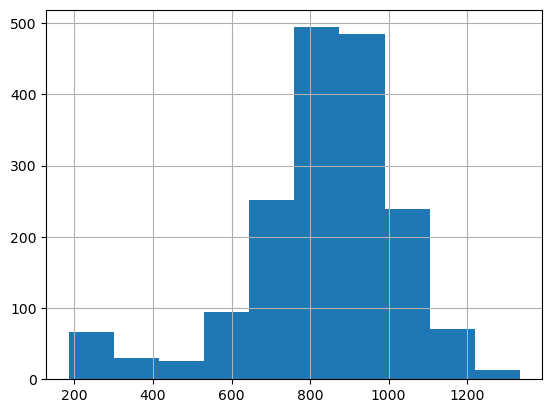

In [95]:
pheno['Weight'].hist()

<Axes: >

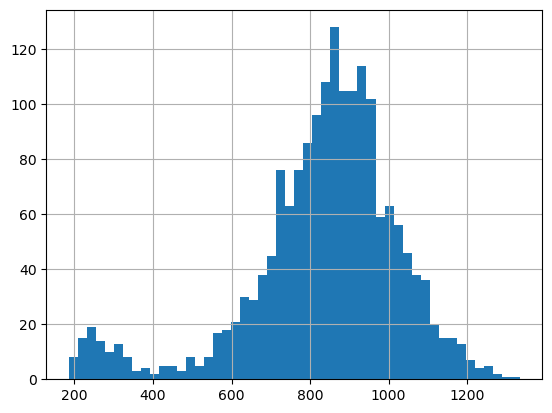

In [96]:
pheno['Weight'].hist(bins=50)

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

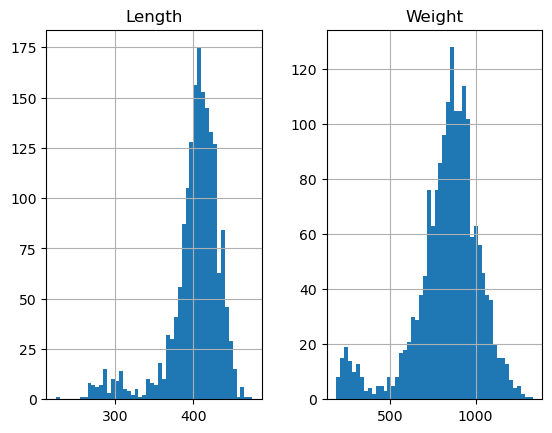

In [97]:
pheno[['Length','Weight']].hist(bins=50)

<Axes: >

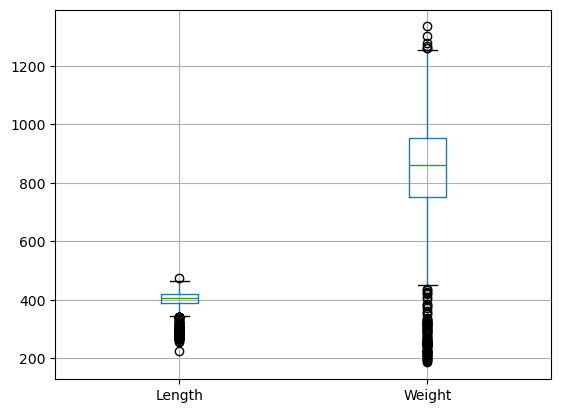

In [98]:
pheno.boxplot(column=['Length','Weight'])

<Axes: >

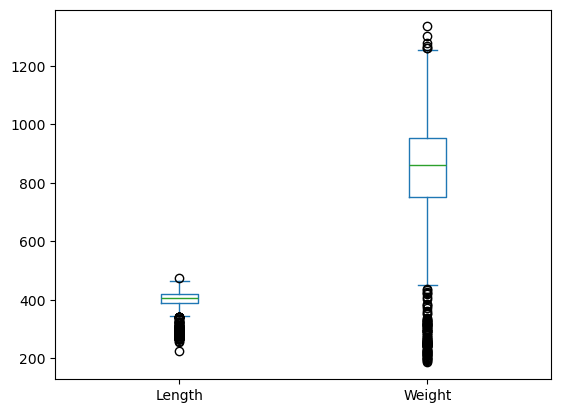

In [99]:
pheno[['Length','Weight']].plot(kind='box')

<Axes: ylabel='Density'>

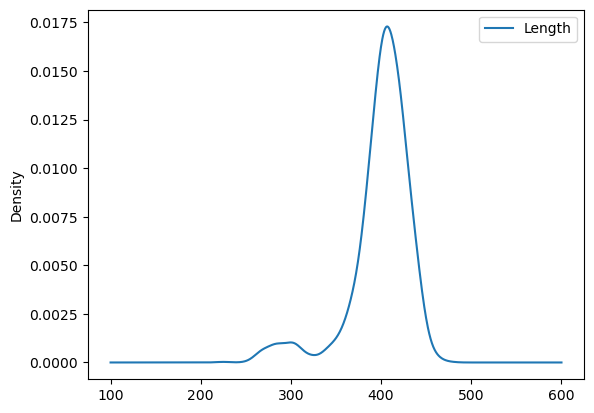

In [100]:
pheno[['Length']].plot(kind='kde')



# Summary

- Series `pd.Series`.
- Dataframe `pd.DataFrame`.
- Read data from file `pd.read_csv`.
- Get a first idea of your data using `head`, `shape`, `describe`, `count`, `nunique`.
- Select parts of the dataframe using `loc` and `iloc`.
- Using `copy` we can create a so called deep copy of our dataframe.
- Keep in mind that using assignment creates a shallow copy. In that case modifying the copy affects the original object and vice versa.
- Delete columns with `drop`.
- axis =1 refers to colums while axis=0 to rows.
- Many functions have an `inplace` argument. Setting it to true modifies the object in place.
- We can use the plot method of a dataframe to make a wide range of plots for the variables we are interested in.

# Exercises

## Exercise 1

* Create a dataframe from the file `tilapia_pedigree.csv`. Name the dataframe `til_ped`. Show the first 10 and the last 10 number of rows. 
* Obtain the number of records of the dataframe. 
* Check the number of unique values for each column of the data frame.
* Change the name of the columns to `Id`, `Sire`, `Dam` and `Population`.
* For each Sire get the number of offspring.
* For each family (sire and dam) get the number of offspring.
* Assign an index that should contail the string `til_` followed by the number of the row. E.g. the index of the first recording should be `til_1` etc.
* Extract the 10th row of the dataframe.
* Create a new dataframe that contains the values of the original dataframe located between the 200th-300th rows and on the first three columns.
* Extract the rows where the last column contains values of either `Mindu` or `Kilola`.
* Extract the rows where the last column doesn't contail values of `Ruaha` and `Utete`.
* Create a copy of the original dataframe and name it `til_ped_new`. Delete the last column. Make sure this doesn't affect the original dataframe.


## Exercise 2

* Create a dataframe from the file tilapia_pheno.txt. Name the dataframe til_pheno. Show the first 10 and the last 10 number of rows. The columns are separated using `;`.
* How many records are in the dataframe.
* For the non-numeric columns estimate the number of unique records.
* Estimate a descriptive statistics summary.
* Which `Location` has the animals with the highest final weight.
* Which `Line` has the lowest mean final weight.
* Estimate correlations between the weight and length related columns.
* Create a new column that has values `Large`, `Medium`, `Small` for the animals that have `Weight_final` above 200, btween 100 - 200 and below 100 respectively.
* Create a new dataframe keeping only records where the difference between `Weight_final` and `Weight_initial` is above 100.
* Create a new dataframe keeping only records where the difference between `Weight_final` and `Weight_initial` is above 120 and the difference between `Length_final` and `Length_initial` is above 5.
* Create histograms depicting the `Weight_final` for each of the `Location.
* Create a boxplot depicting the difference between `Weight_final` and `Weight_initial` for each `Line`.